In [2]:
import torch


inputs=torch.tensor(
    [[0.43,0.15,0.89], #your input(x^1)
     [0.55,0.87,0.66], #journey(x^2)
     [0.57,0.85,0.64], #starts(x^3)
     [0.22,0.58,0.33], #with (x^4)
     [0.77,0.25,0.10], #one(x^5)
     [0.05,0.80,0.55]  #step(x^6)
     ]
)


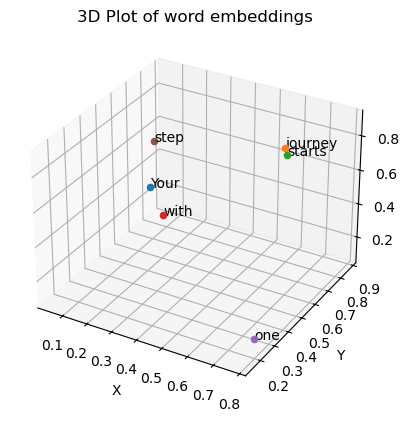

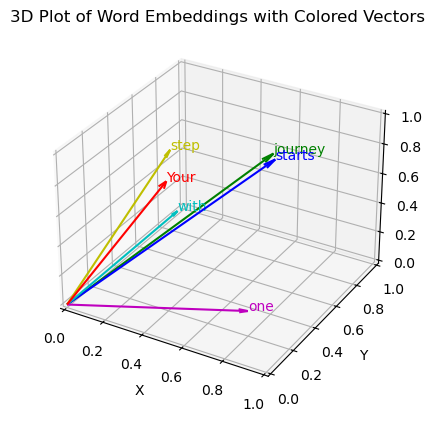

In [6]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

words =['Your', "journey","starts","with","one","step"]

x_coords=inputs[:,0].numpy()
y_coords=inputs[:,1].numpy()
z_coords=inputs[:,2].numpy()


fig=plt.figure()
ax=fig.add_subplot(111,projection='3d')

for x,y,z, word in zip(x_coords,y_coords,z_coords,words):
    ax.scatter(x,y,z)
    ax.text(x,y,z,word,fontsize=10)
    
ax.set_xlabel("X")
ax.set_ylabel('Y')
ax.set_zlabel('Z')

plt.title('3D Plot of word embeddings')
plt.show()

# Create 3D plot with vectors from origin to each point, using different colors
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Define a list of colors for the vectors
colors = ['r', 'g', 'b', 'c', 'm', 'y', 'r']

# Plot each vector with a different color and annotate with the corresponding word
for (x, y, z, word, color) in zip(x_coords, y_coords, z_coords, words, colors):
    # Draw vector from origin to the point (x, y, z) with specified color and smaller arrow length ratio
    ax.quiver(0, 0, 0, x, y, z, color=color, arrow_length_ratio=0.05)
    ax.text(x, y, z, word, fontsize=10, color=color)

# Set labels for axes
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_zlabel('Z')

# Set plot limits to keep arrows within the plot boundaries
ax.set_xlim([0, 1])
ax.set_ylim([0, 1])
ax.set_zlim([0, 1])

plt.title('3D Plot of Word Embeddings with Colored Vectors')
plt.show()



In [ ]:
query=inputs[1] # 2nd input 
attn_scores_2=torch.empty(inputs.shape[0])
for i ,x_i in enumerate(inputs):
    attn_scores_2[i]=torch.dot(x_i,query)
    
    
print(attn_scores_2)


attn_weights_2_tmp=attn_scores_2/attn_scores_2.sum()


print("attention weights", attn_weights_2_tmp)
print("Sum:",attn_weights_2_tmp.sum())


#this summing of attention weights is not efficient, do softmax for opitimize it
# becuase of there is a attention for an input it should be 1 and others should be 0 , 
# but while doing summation its very very close to zero and 1 which confuses model during backpropogation

tensor([0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865])
attention weights tensor([0.1455, 0.2278, 0.2249, 0.1285, 0.1077, 0.1656])
Sum: tensor(1.0000)


In [11]:
# normal softmax has summation of  (e^(x_1))/sum
# pytorch softmax has summation of (e^(x_1-max))/sum

def softmax_naive(x):
    return torch.exp(x)/ torch.exp(x).sum(dim=0)

attn_weights_2_naive=softmax_naive(attn_scores_2)

print("Attention weights: ",attn_weights_2_naive)
print("Sum:", attn_weights_2_naive.sum()) 

Attention weights:  tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: tensor(1.)


In [ ]:
#both naive and pytorch implmentation of attention is same because we dont have any large values
#we dont have issue of overflow or underflow here


attn_weights_2=torch.softmax(attn_scores_2, dim=0)
print(f"attention weights: {attn_weights_2}")
print(f"Sum: {attn_weights_2.sum()}")



attention weights: tensor([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])
Sum: 1.0


In [15]:
# getting final context vector fr 2nd input

context_vec_2=torch.zeros(query.shape)
for i,x_i in enumerate(inputs):
    context_vec_2+=attn_weights_2[i]*x_i
print(context_vec_2)



tensor([0.4419, 0.6515, 0.5683])


In [16]:
# attn scores for all the inputs
attn_scores=torch.empty(6,6)

for i , x_i in enumerate(inputs):
    for j,x_j in enumerate(inputs):
        attn_scores[i,j]=torch.dot(x_i,x_j)
        
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
#more efficient way to multiply matrix
attn_scores=inputs @ inputs.T
print(attn_scores)

tensor([[0.9995, 0.9544, 0.9422, 0.4753, 0.4576, 0.6310],
        [0.9544, 1.4950, 1.4754, 0.8434, 0.7070, 1.0865],
        [0.9422, 1.4754, 1.4570, 0.8296, 0.7154, 1.0605],
        [0.4753, 0.8434, 0.8296, 0.4937, 0.3474, 0.6565],
        [0.4576, 0.7070, 0.7154, 0.3474, 0.6654, 0.2935],
        [0.6310, 1.0865, 1.0605, 0.6565, 0.2935, 0.9450]])


In [ ]:
# now doing the softmax for each row, dim is -1 when normalize along the column, based on the last dimension of the input matrix
attn_weights=torch.softmax(attn_scores,dim=-1)
print(attn_weights)

tensor([[0.2098, 0.2006, 0.1981, 0.1242, 0.1220, 0.1452],
        [0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581],
        [0.1390, 0.2369, 0.2326, 0.1242, 0.1108, 0.1565],
        [0.1435, 0.2074, 0.2046, 0.1462, 0.1263, 0.1720],
        [0.1526, 0.1958, 0.1975, 0.1367, 0.1879, 0.1295],
        [0.1385, 0.2184, 0.2128, 0.1420, 0.0988, 0.1896]])


In [19]:
#summing 2nd row
sum([0.1385, 0.2379, 0.2333, 0.1240, 0.1082, 0.1581])

1.0

In [20]:
# getting context vector for all inputs

context_vectors=attn_weights @ inputs

print(context_vectors)

tensor([[0.4421, 0.5931, 0.5790],
        [0.4419, 0.6515, 0.5683],
        [0.4431, 0.6496, 0.5671],
        [0.4304, 0.6298, 0.5510],
        [0.4671, 0.5910, 0.5266],
        [0.4177, 0.6503, 0.5645]])
